# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Import required libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
import cv2
import os

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Import pickled data
training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


In [4]:
sign_name = pd.read_csv("signnames.csv", index_col="ClassId")
SIGN_NAMES = sign_name.SignName.values
sign_name["Amount"] = [sum(y_train==c) for c in range(n_classes)]
sign_name.sort_values("Amount", ascending=False)

,SignName,Amount
ClassId,,
2,Speed limit (50km/h),2010
1,Speed limit (30km/h),1980
13,Yield,1920
12,Priority road,1890
38,Keep right,1860
10,No passing for vehicles over 3.5 metric tons,1800
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
25,Road work,1350


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

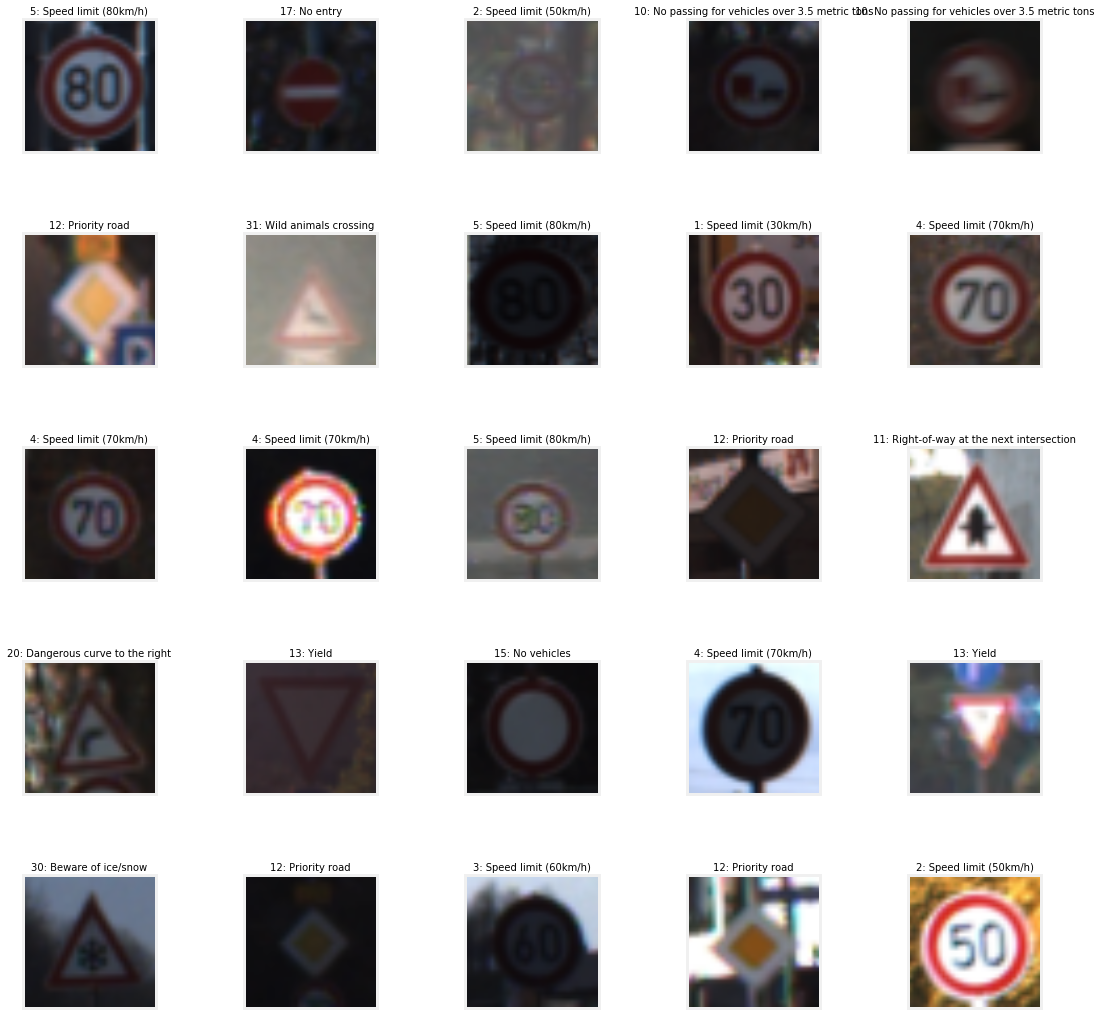

In [102]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

def plot_images(images, columns, labels=None):
    plt.figure(figsize=(15,15))
    num_examples = len(images)
    for key, image in enumerate(images):
        plt.subplot(num_examples//columns, columns, key+1)
        plt.xticks([])
        plt.yticks([])
        if image.shape[-1] == 1:
            image = np.squeeze(image)
            plt.imshow(image, cmap="gray")
        else:
            plt.imshow(image)
        if labels is not None:
            plt.gca().set_title("{}: {}".format(labels[key], SIGN_NAMES[labels[key]]), fontsize=10)
    plt.tight_layout()
    plt.show()

columns = 5

indices = np.random.choice(n_train, size=25, replace=False)
plot_images(X_train[indices], columns, labels=y_train[indices])

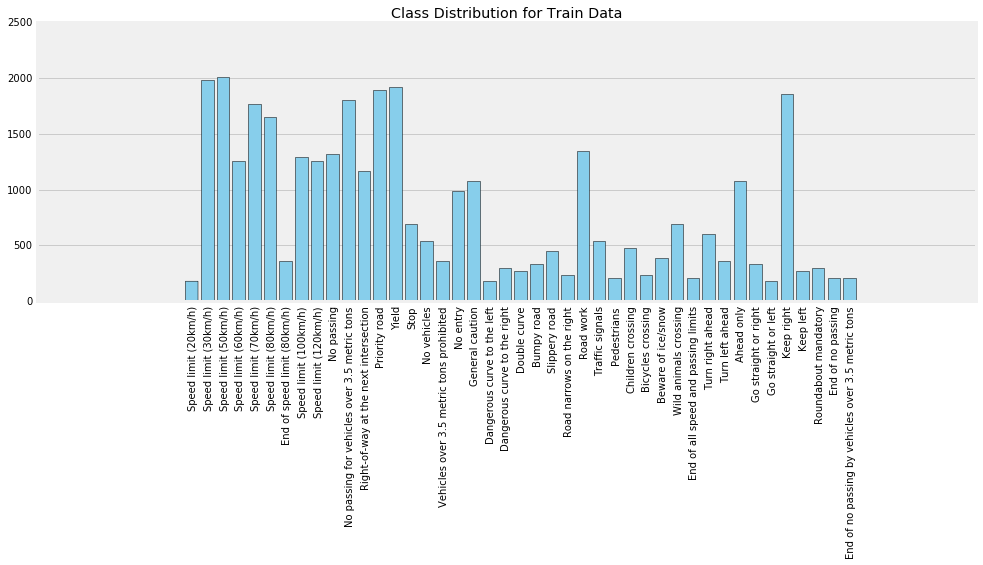

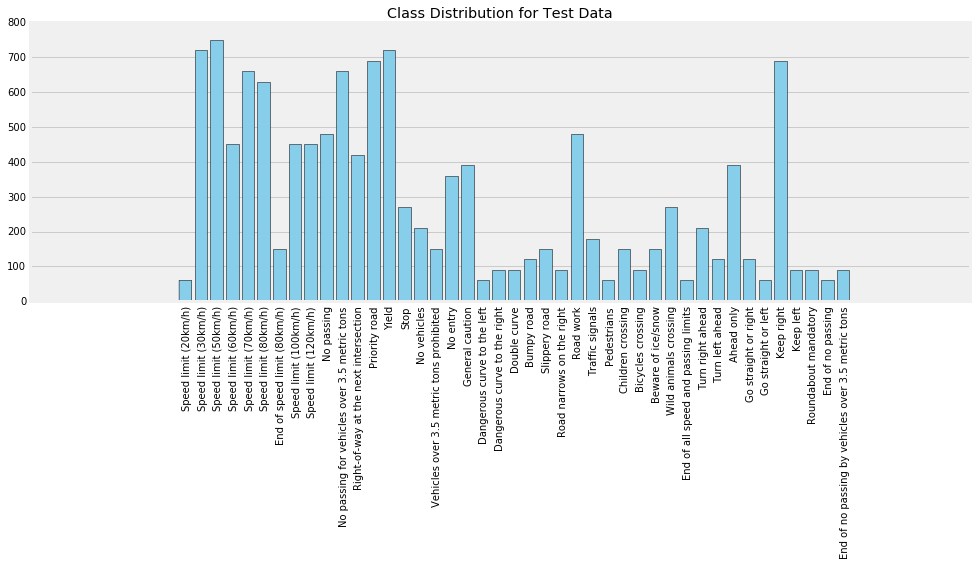

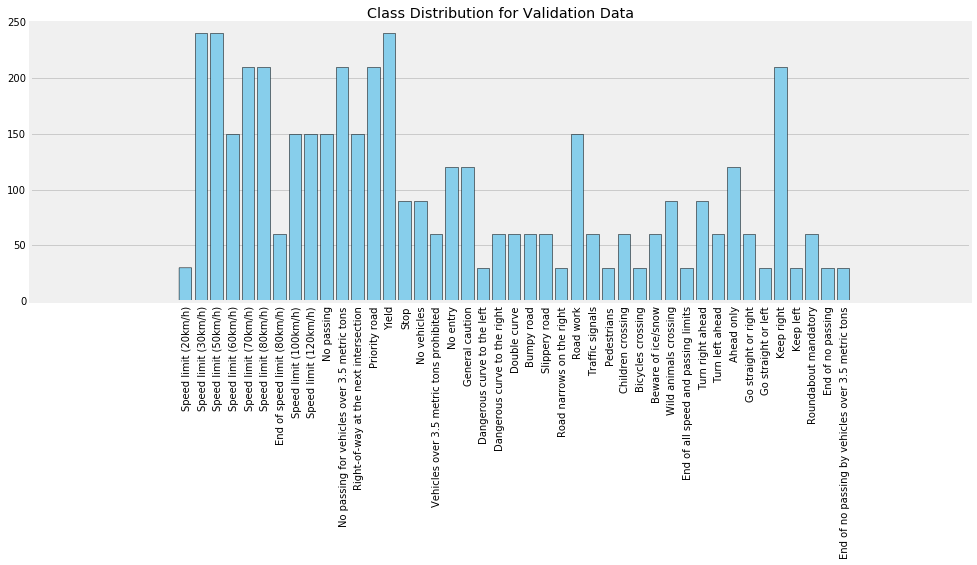

In [6]:
# Show class distribution
def plot_class_distribution(classes, title):
        plt.figure(figsize=(15, 5))
        plt.title("Class Distribution for {}".format(title))
        plt.hist(classes, bins=np.arange(-0.5,n_classes), width=0.8, color="skyblue", ec="black")
        plt.gca().grid(axis="x")
        plt.xticks(np.arange(n_classes), SIGN_NAMES, rotation="vertical")
        plt.show()
plot_class_distribution(y_train, "Train Data")
plot_class_distribution(y_test, "Test Data")
plot_class_distribution(y_valid, "Validation Data")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
label_binarizer = LabelBinarizer()

y_train_one_hot = label_binarizer.fit_transform(y_train)
y_valid_one_hot = label_binarizer.fit_transform(y_valid)
y_test_one_hot = label_binarizer.fit_transform(y_test)

In [169]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize_1(img):
    return np.array((img / 255) - 0.5, dtype=np.float32)

def normalize_2(img):
    return np.array((img - img.mean()) / img.std(), dtype=np.float32)

def gray_scale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)[:,:,np.newaxis]
    return img

def resize_image(img, size):
    return cv2.resize(img, dsize=size[:2])

def rotate_random(img, angle):
    if angle == 0 :
        return img
    angle = np.random.uniform(-angle, angle)
    r, c = img.shape[:2]
    dim = c, r
    center = c/2, r/2
    scale = 1.0
    rotation = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(img, rotation, dim)

def translate_random(img, translation):
    if translation == 0:
        return img
    r, c = img.shape[:2]
    dim = c, r
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)
    trans = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(img, trans, dim)

def augment_image(img, angle, translation):
    img = rotate_random(img, angle)
    img = translate_random(img, translation)
    return img

def preprocessing(functions, X=X_train, y=y_train_one_hot, target_samples=None):
    if len(X.shape) == 4:
        num_examples = len(X)
    else:
        num_examples = 1
    if target_samples == None:
        target_samples = num_examples
        
    for func in functions:
        # X is an array of images
        if target_samples > 1:
            # Only augment additional images
            if func == augmenter:
                if num_examples < target_samples:
                    size = target_samples - num_examples
                    indices = np.random.choice(num_examples, size=size)
                    x_augmented = np.array([func(x) for x in X[indices]])
                    X, y = np.concatenate((X, x_augmented), axis=0), np.concatenate((y, y[indices]), axis=0)
                else:
                    continue
            else:
                X = np.array([func(x) for x in X])
        # X is a single image
        else:
            X = func(X)
    return (X, y)


### Model Architectures

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Helper functions
def fully_connected (x, W, b):
    return tf.add(tf.matmul(x, W), b)

def conv2d(x, W, b, strides=1, padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2, padding='SAME'):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)

def relu(x):
    return tf.nn.relu(x)

def init_layer_weights_bias(shape, mu=0, sigma=0.1):
    W = tf.Variable(tf.truncated_normal(shape, mean=mu, stddev=sigma), name="W")
    b = tf.Variable(tf.zeros(shape[-1]), name="b")
    return W, b

def dropout(x, is_training, keep_prob=0.5):
    x = tf.cond(is_training, lambda: tf.nn.dropout(x, keep_prob), lambda: x)
    return x

In [107]:
# LeNet architecture for grayscale images
def lenet_gray(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x1. Output: 28x28x6
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 1, 6])
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x6. Output: 14x14x6.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x16.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 6, 16])
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x16. Output: 5x5x16.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x32. Output: 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input: 400. Output: 120.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([400, 120])
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 120. Output: 84.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([120, 84])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 64. Output: 43.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([84, 43])
        logits = fully_connected(fc2, fc3_W, fc3_b)
    
    return logits, conv1, conv2

In [12]:
# LeNet architecture for color images 
def lenet_color(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x12
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 6])
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x6. Output: 14x14x6.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x16.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 6, 16])
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x16. Output: 5x5x16.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x32. Output: 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input: 400. Output: 120.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([400, 120])
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 120. Output: 84.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([120, 84])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 64. Output: 43.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([84, 43])
        logits = fully_connected(fc2, fc3_W, fc3_b)
    
    return logits, conv1, conv2

In [120]:
# Double depth of conv layers and first dense layer
def network_1(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x12
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 12]) # ==> doubled
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x12. Output: 14x14x12.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x32.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 12, 32]) # ==> doubled
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x32. Output: 5x5x32.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x32. Output: 800.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input: 800. Output: 240.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([800, 240]) # ==> doubled
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 240. Output: 84.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([240, 84])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 84. Output: 43.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([84, 43])
        logits = fully_connected(fc2, fc3_W, fc3_b)
    
    return logits, conv1, conv2

In [14]:
# Quadruple depth of conv layers and first two dense layers
def network_2(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x24
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 24]) # ==> quadrupled
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x24. Output: 14x14x24.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x64.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 24, 64]) # ==> quadrupled
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x64. Output: 5x5x64.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x64. Output: 1600.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input: 1600. Output: 480.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([1600, 480]) # ==> quadrupled
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 480. Output: 336.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([480, 336]) # ==> quadrupled
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 64. Output: 43.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([336, 43])
        logits = fully_connected(fc2, fc3_W, fc3_b)
    
    return logits, conv1, conv2

In [124]:
# Add another dense layer to the quadrupled approach
def network_3(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x24
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 24])
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x24. Output: 14x14x24.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x64.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 24, 64])
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x64. Output: 5x5x64.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x64. Output: 1600.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input: 1600. Output: 480.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([1600, 480])
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 480. Output: 220.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([480, 220])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 220. Output: 96.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([220, 96])
        fc3 = fully_connected(fc2, fc3_W, fc3_b)
    
    # ReLu
    fc3 = relu(fc3)
    
    # Layer 5: Fully Connected. Input: 96. Output: 43.
    with tf.variable_scope("dense_4"):
        fc4_W, fc4_b = init_layer_weights_bias([96, 43])
        logits = fully_connected(fc3, fc4_W, fc4_b)
        
    return logits, conv1, conv2

In [16]:
# Change dimensions of layers
def network_4(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x16
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 16])
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x16. Output: 14x14x16.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x32.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 16, 32])
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x32. Output: 5x5x32.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x32. Output: 800.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input: 800. Output: 128.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([800, 128])
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 128. Output: 64.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([128, 64])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 64. Output: 43.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([64, 43])
        logits = fully_connected(fc2, fc3_W, fc3_b)
    
    return logits, conv1, conv2

In [17]:
# Add dropout after flattening
def network_5(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x16
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 16])
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x16. Output: 14x14x16.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x32.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 16, 32])
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x32. Output: 5x5x32.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x32. Output: 800.
    fc0 = flatten(conv2)
    
    fc0 = dropout(fc0, is_training, keep_prob=0.5)
    
    # Layer 3: Fully Connected. Input: 800. Output: 128.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([800, 128])
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 128. Output: 64.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([128, 64])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 64. Output: 43.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([64, 43])
        logits = fully_connected(fc2, fc3_W, fc3_b)
    
    return logits, conv1, conv2

In [133]:
# Increase dimensions of layers again but use dropout after flattening
def network_6(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x24
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 24])
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x24. Output: 14x14x24.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x64.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 24, 64])
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x64. Output: 5x5x64.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x64. Output: 1600.
    fc0 = flatten(conv2)
    
    fc0 = dropout(fc0, is_training, keep_prob=0.5)
    
    # Layer 3: Fully Connected. Input: 1600. Output: 480.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([1600, 480])
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 480. Output: 128.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([480, 128])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 128. Output: 43.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([128, 43])
        logits = fully_connected(fc2, fc3_W, fc3_b)
    
    return logits, conv1, conv2

In [137]:
# Add one more dense layer and use dropout after flattening
def network_7(x, is_training, keep_prob=0.5):
    # Layer 1: Convolutional. Input: 32x32x3. Output: 28x28x24
    with tf.variable_scope("conv_1"):
        conv1_W, conv1_b = init_layer_weights_bias([5, 5, 3, 24])
        conv1 = conv2d(x, conv1_W, conv1_b, padding='VALID')
    
    # Pooling. Input: 28x28x24. Output: 14x14x24.
    conv1 = maxpool2d(conv1)
    
    # ReLu
    conv1 = relu(conv1)
    
    # Layer 2: Convolutional. Output: 10x10x64.
    with tf.variable_scope("conv_2"):
        conv2_W, conv2_b = init_layer_weights_bias([5, 5, 24, 64])
        conv2 = conv2d(conv1, conv2_W, conv2_b, padding='VALID')
    
    # Pooling. Input: 10x10x64. Output: 5x5x64.
    conv2 = maxpool2d(conv2)
    
    #ReLu
    conv2 = relu(conv2)
    
    # Flatten. Input: 5x5x64. Output: 1600.
    fc0 = flatten(conv2)
    
    # Dropout
    fc0 = dropout(fc0, is_training, keep_prob=0.5)
    
    # Layer 3: Fully Connected. Input: 1600. Output: 480.
    with tf.variable_scope("dense_1"):
        fc1_W, fc1_b = init_layer_weights_bias([1600, 480])
        fc1 = fully_connected(fc0, fc1_W, fc1_b)
        
    # ReLu
    fc1 = relu(fc1)
    
    # Layer 4: Fully Connected. Input: 480. Output: 200.
    with tf.variable_scope("dense_2"):
        fc2_W, fc2_b = init_layer_weights_bias([480, 200])
        fc2 = fully_connected(fc1, fc2_W, fc2_b)
        
    # ReLu
    fc2 = relu(fc2)
    
    # Layer 5: Fully Connected. Input: 200. Output: 84.
    with tf.variable_scope("dense_3"):
        fc3_W, fc3_b = init_layer_weights_bias([200, 84])
        fc3 = fully_connected(fc2, fc3_W, fc3_b)
    
    #ReLu
    fc3 = relu(fc3)
    
    # Layer 6: Fully Connected. Input: 84. Output: 43.
    with tf.variable_scope("dense_4"):
        fc4_W, fc4_b = init_layer_weights_bias([84, 43])
        logits = fully_connected(fc3, fc4_W, fc4_b)
    
    return logits, conv1, conv2

In [96]:
def build_graph(architecture, learning_rate=0.001, image_shape=(32, 32, 3)):
    # Reset default Graph before building a new one
    tf.reset_default_graph()
    x = tf.placeholder(tf.float32, (None, *image_shape), name="x")
    y = tf.placeholder(tf.int32, (None), name="y")
    is_training = tf.placeholder(tf.bool, name="is_training")

    logits, conv1, conv2 = architecture(x, is_training)
    saver = tf.train.Saver()
    with tf.variable_scope("evaluation"):
        y_one_hot = tf.one_hot(y, 43, name="y_one_hot")
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
        loss_operation = tf.reduce_mean(cross_entropy, name="loss")

    with tf.variable_scope("training"):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_operation = optimizer.minimize(loss_operation)

    with tf.variable_scope("prediction"):
        prediction = tf.argmax(logits, 1, name="prediction")
        correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        k = tf.placeholder(tf.int32, name="k")
        probability = tf.nn.softmax(logits, name="probability")
        top_k = tf.nn.top_k(probability, k=k)
    # Return conv1 & conv2 for layer visualization purposes
    model = {"x": x, "y": y, "k": k, "is_training": is_training, "training": training_operation, 
             "prediction": prediction, "accuracy": accuracy_operation, "probability": probability, 
             "top_k": top_k, "saver": saver, "conv_1": conv1, "conv_2": conv2}
    return  model

In [21]:
def show_learning_curve(learning_curve):
    epochs, train, valid = learning_curve
    plt.figure(figsize=(10, 10))
    plt.plot(epochs, train, label='train')
    plt.plot(epochs, valid, label='validation')
    plt.title('Learning Curve')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.xticks(epochs)
    plt.legend(loc='lower right')

In [30]:
def evaluate(model, X_data, y_data, batch_size=128):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    x = model["x"]
    y = model["y"]
    is_training = model["is_training"]
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy = sess.run(model["accuracy"], feed_dict={x: batch_x, y: batch_y, is_training: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [54]:
def train_model(model, train=(X_train, y_train_one_hot), valid=(X_valid, y_valid_one_hot), epochs=5, batch_size=128, file_name="traffic_sign.ckpt"):
    X_train, y_train = train
    X_valid, y_valid = valid
    x = model["x"]
    y = model["y"]
    is_training = model["is_training"]
    saver = model["saver"]
    # Uses the default graph
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        learning_curve = []
        print("Training...")
        print()
        for i in range(epochs):
            X_data, y_data = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_data[offset:end], y_data[offset:end]
                sess.run(model["training"], feed_dict={x: batch_x, y: batch_y, is_training: True})
            training_accuracy = evaluate(model, X_train, y_train, batch_size=batch_size)
            validation_accuracy = evaluate(model, X_valid, y_valid, batch_size=batch_size)
            print("EPOCH {}".format(i+1))
            print("Training accuracy = {:.3f}".format(training_accuracy))
            print("Validation accuracy = {:.3f}".format(validation_accuracy))
            print()
            learning_curve.append([i, training_accuracy, validation_accuracy])
        saver.save(sess,"./checkpoint/{}".format(file_name))
        print("Model saved under: ./checkpoint/{}".format(file_name))
    show_learning_curve(np.array(learning_curve).T)

In [175]:
def predict_traffic_signs(model, X, file_name, batch_size=128):
    x = model["x"]
    is_training = model["is_training"]
    k = model["k"]
    saver = model["saver"]
    if len(X) >= batch_size:
        batch_size = batch_size
    else:
        batch_size = len(X)
    predict = []
    top_k_ = []
    with tf.Session() as sess:
        saver.restore(sess, "./checkpoint/{}".format(file_name))
        for offset in range(0, len(X), batch_size):
            end = offset + batch_size
            batch_x = X[offset:end]
            pred, top = sess.run([model["prediction"], model["top_k"]], feed_dict={x: batch_x, is_training: False, k: 5})
        predict.extend(pred)
        top_k_.extend(top)

    print("Prediction done.")
    return predict, top_k_

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Hyperparameters

In [110]:
LEARNING_RATE = 0.001
EPOCHS = 5
BATCH_SIZE = 128
SAMPLES_PER_EPOCH = 60000
IMG_SHAPE = (32, 32, 3)

### Train the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set

In [27]:
augmenter = lambda x: augment_image(x, angle=10, translation=5)
# resizer = lambda x: resize_image(x, size=IMG_SHAPE)

--------------------------------------------------
Reference Images
--------------------------------------------------


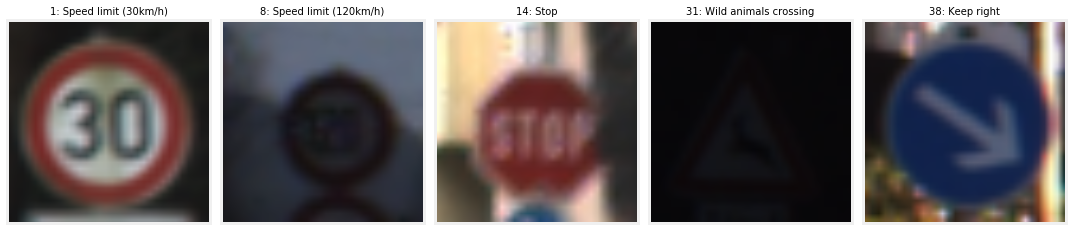

--------------------------------------------------
Augmented Images
--------------------------------------------------


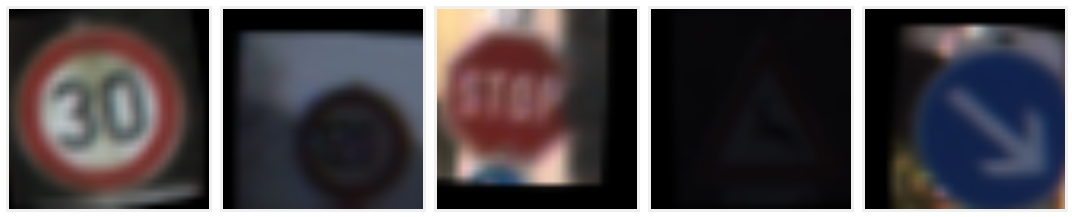

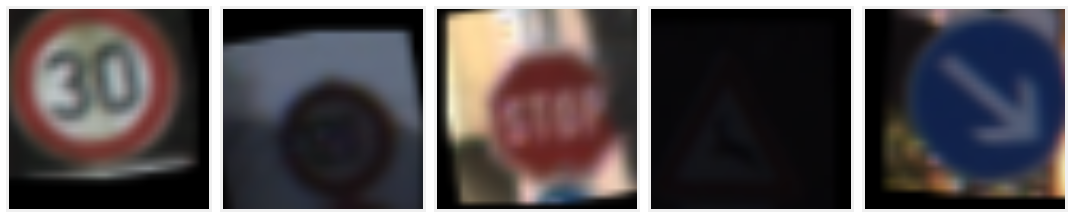

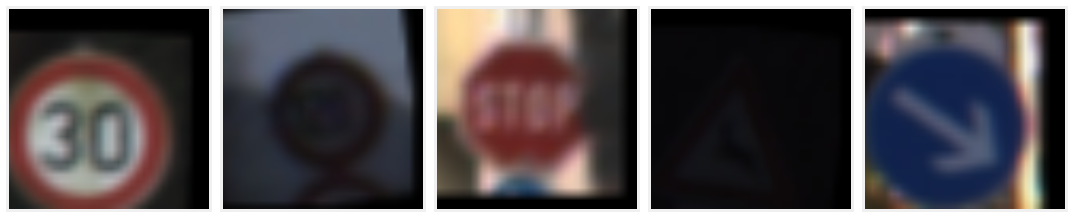

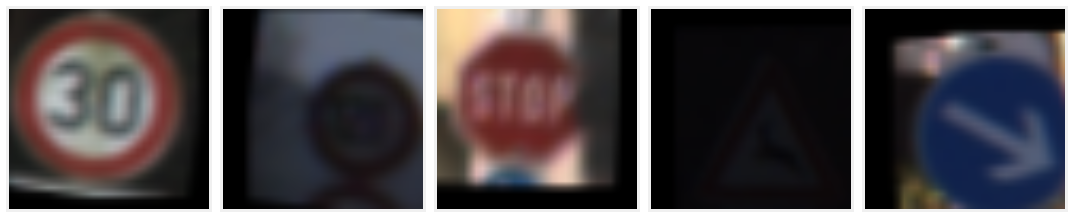

In [28]:
print("-"*50)
print("Reference Images")
print("-"*50)
n_examples = 5
indices = np.random.choice(n_train, size=n_examples, replace=False)
plot_images(X_train[indices], n_examples, labels=y_train[indices])

print("-"*50)
print("Augmented Images")
print("-"*50)
for _ in range(4):
    imgs = []
    for x, y in zip(X_train[indices], y_train[indices]):
        img, y = preprocessing([augmenter], X=x, y=y)
        imgs.append(img)
    plot_images(imgs, n_examples)

Training...

EPOCH 1
Training accuracy = 0.801
Validation accuracy = 0.692

EPOCH 2
Training accuracy = 0.914
Validation accuracy = 0.799

EPOCH 3
Training accuracy = 0.938
Validation accuracy = 0.814

EPOCH 4
Training accuracy = 0.965
Validation accuracy = 0.852

EPOCH 5
Training accuracy = 0.969
Validation accuracy = 0.846

Model saved under: ./checkpoint/lenet_color.ckpt


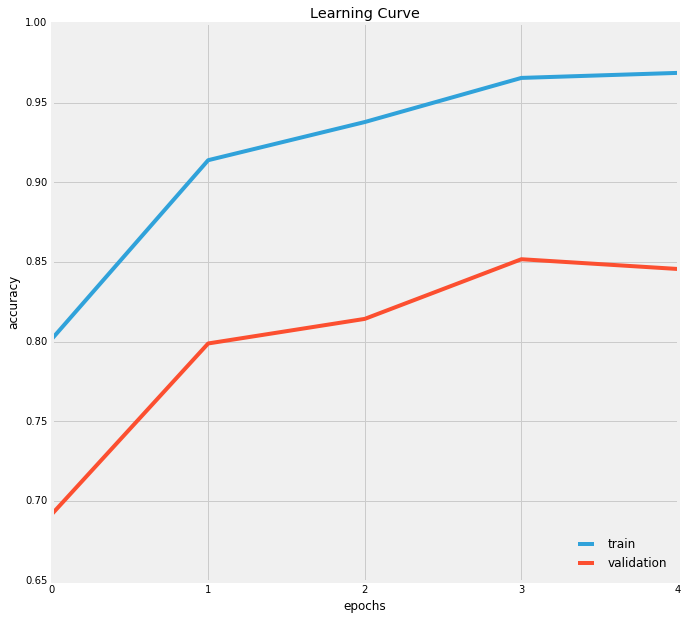

In [33]:
# LeNet for color images as benchmark model  
model = build_graph(lenet_color, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, file_name="lenet_color.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.812
Validation accuracy = 0.747

EPOCH 2
Training accuracy = 0.915
Validation accuracy = 0.824

EPOCH 3
Training accuracy = 0.951
Validation accuracy = 0.859

EPOCH 4
Training accuracy = 0.959
Validation accuracy = 0.871

EPOCH 5
Training accuracy = 0.977
Validation accuracy = 0.887

Model saved under: ./checkpoint/lenet_gray.ckpt


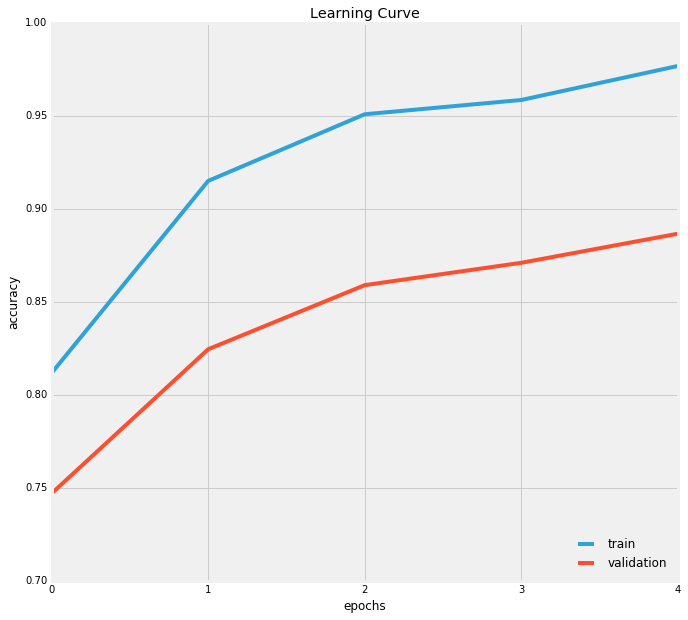

In [108]:
# LeNet for gray scale images
train_data = preprocessing([gray_scale])
valid_data = preprocessing([gray_scale], X=X_valid, y=y_valid_one_hot)
model = build_graph(lenet_gray, learning_rate=LEARNING_RATE, image_shape=(32, 32, 1))
train_model(model, train=train_data, valid=valid_data, file_name="lenet_gray.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.586
Validation accuracy = 0.632

EPOCH 2
Training accuracy = 0.753
Validation accuracy = 0.777

EPOCH 3
Training accuracy = 0.815
Validation accuracy = 0.800

EPOCH 4
Training accuracy = 0.850
Validation accuracy = 0.828

EPOCH 5
Training accuracy = 0.882
Validation accuracy = 0.849

Model saved under: ./checkpoint/lenet_augmented.ckpt


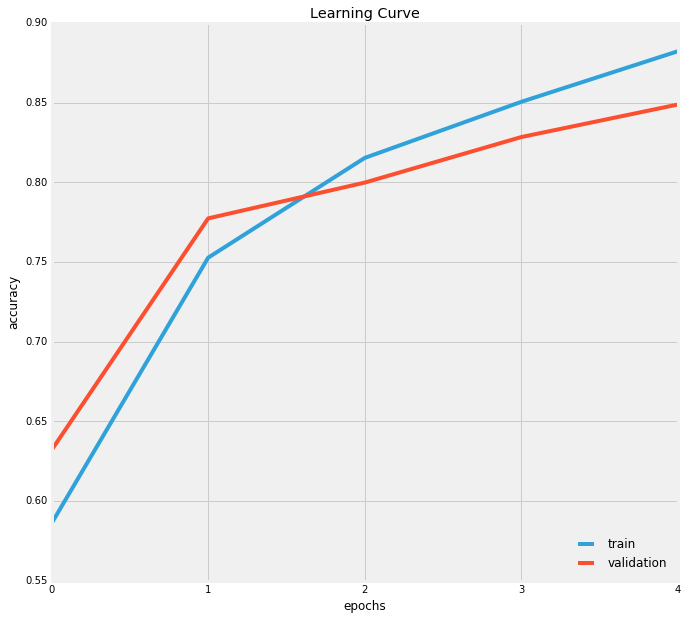

In [111]:
# LeNet with augmented images
train_data = preprocessing([augmenter], target_samples=SAMPLES_PER_EPOCH)
model = build_graph(lenet_color, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, file_name="lenet_augmented.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

--------------------------------------------------
Normalize: X/255 - 0.5
--------------------------------------------------
Training...

EPOCH 1
Training accuracy = 0.805
Validation accuracy = 0.717

EPOCH 2
Training accuracy = 0.907
Validation accuracy = 0.807

EPOCH 3
Training accuracy = 0.943
Validation accuracy = 0.825

EPOCH 4
Training accuracy = 0.959
Validation accuracy = 0.853

EPOCH 5
Training accuracy = 0.971
Validation accuracy = 0.878

Model saved under: ./checkpoint/lenet_normalize_1.ckpt

--------------------------------------------------
Normalize: (X-X.mean()) - X.std()
--------------------------------------------------
Training...

EPOCH 1
Training accuracy = 0.893
Validation accuracy = 0.804

EPOCH 2
Training accuracy = 0.945
Validation accuracy = 0.848

EPOCH 3
Training accuracy = 0.977
Validation accuracy = 0.888

EPOCH 4
Training accuracy = 0.983
Validation accuracy = 0.886

EPOCH 5
Training accuracy = 0.986
Validation accuracy = 0.896

Model saved under: ./checkp

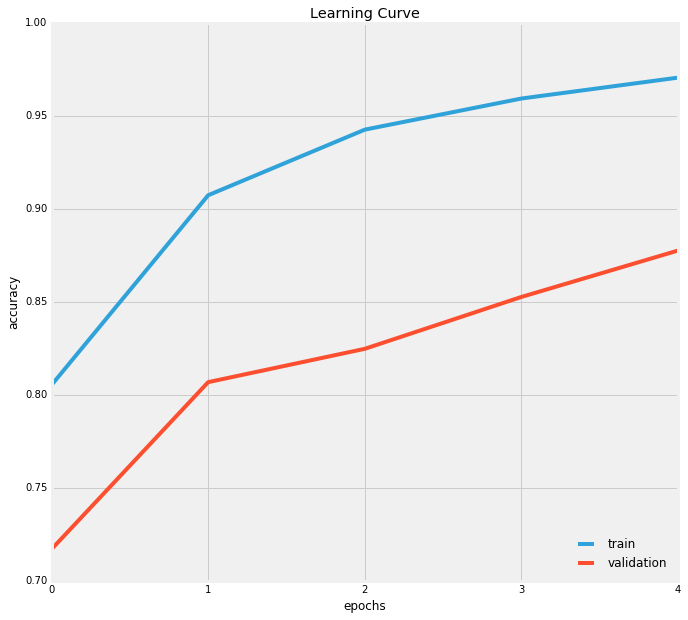

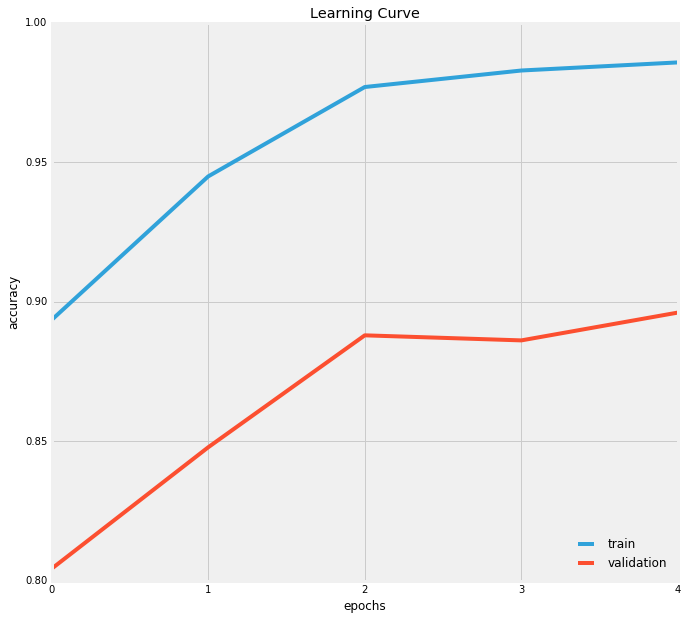

In [117]:
# LeNet with different normalization processes
print("-"*50)
print("Normalize: X/255 - 0.5")
print("-"*50)
train_data = preprocessing([normalize_1])
valid_data = preprocessing([normalize_1], X=X_valid, y=y_valid_one_hot)
model = build_graph(lenet_color, learning_rate=LEARNING_RATE)
train_model(model, train=train_data, valid=valid_data, file_name="lenet_normalize_1.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

print()
print("-"*50)
print("Normalize: (X-X.mean()) - X.std()")
print("-"*50)
train_data = preprocessing([normalize_2])
valid_data = preprocessing([normalize_2], X=X_valid, y=y_valid_one_hot)
model = build_graph(lenet_color, learning_rate=LEARNING_RATE)
train_model(model, train=train_data, valid=valid_data, file_name="lenet_normalize_2.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

In [118]:
# Training set for the following models to be comparables
train_data = preprocessing([augmenter, normalize_2], target_samples=SAMPLES_PER_EPOCH)
valid_data = preprocessing([normalize_2], X=X_valid, y=y_valid_one_hot)

Training...

EPOCH 1
Training accuracy = 0.847
Validation accuracy = 0.872

EPOCH 2
Training accuracy = 0.927
Validation accuracy = 0.890

EPOCH 3
Training accuracy = 0.949
Validation accuracy = 0.897

EPOCH 4
Training accuracy = 0.976
Validation accuracy = 0.918

EPOCH 5
Training accuracy = 0.981
Validation accuracy = 0.915

Model saved under: ./checkpoint/net_1.ckpt


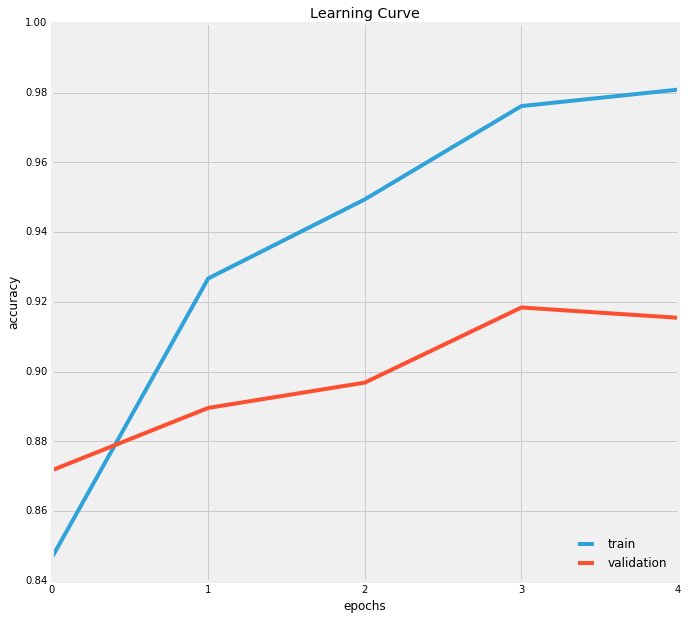

In [121]:
# 1 - Double depth of some layers
model = build_graph(network_1, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, valid=valid_data, file_name="net_1.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.908
Validation accuracy = 0.894

EPOCH 2
Training accuracy = 0.970
Validation accuracy = 0.897

EPOCH 3
Training accuracy = 0.983
Validation accuracy = 0.927

EPOCH 4
Training accuracy = 0.983
Validation accuracy = 0.914

EPOCH 5
Training accuracy = 0.994
Validation accuracy = 0.934

Model saved under: ./checkpoint/net_2.ckpt


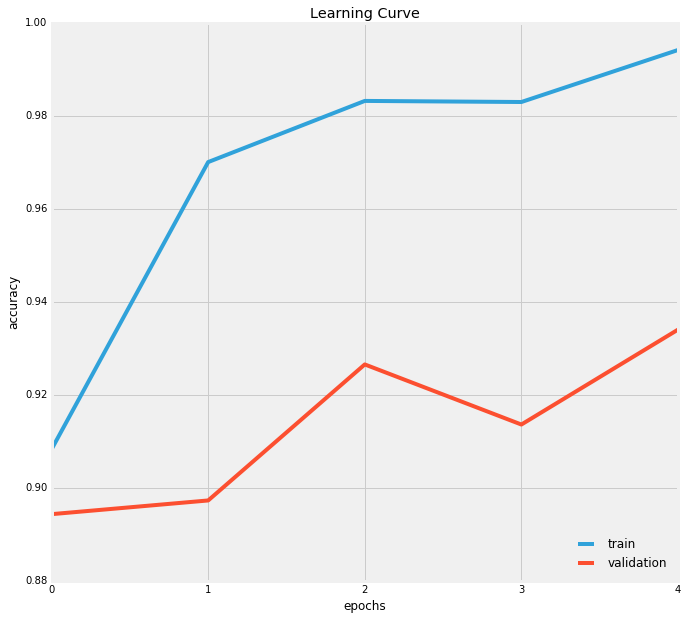

In [122]:
# 2 - Quadruple depth of some layers
model = build_graph(network_2, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, valid=valid_data, file_name="net_2.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.898
Validation accuracy = 0.884

EPOCH 2
Training accuracy = 0.957
Validation accuracy = 0.910

EPOCH 3
Training accuracy = 0.975
Validation accuracy = 0.920

EPOCH 4
Training accuracy = 0.986
Validation accuracy = 0.919

EPOCH 5
Training accuracy = 0.991
Validation accuracy = 0.938

Model saved under: ./checkpoint/net_3.ckpt


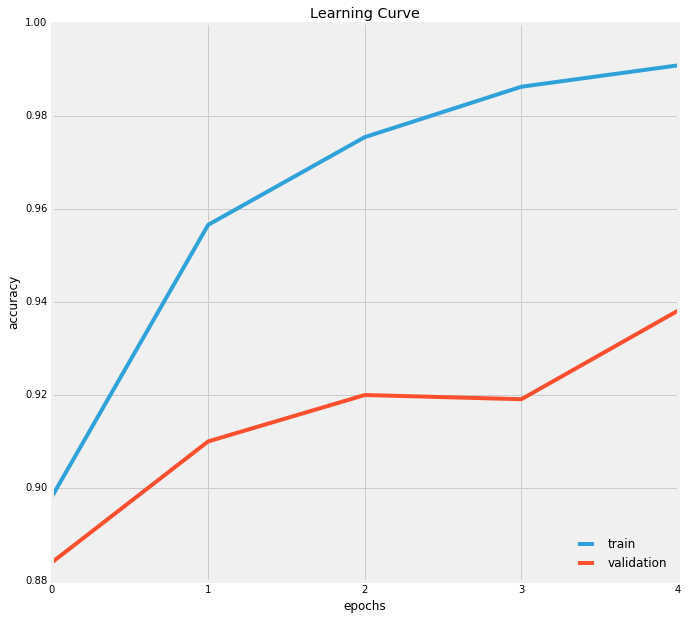

In [125]:
# 3 - Additional dense layer
model = build_graph(network_3, learning_rate=LEARNING_RATE)
train_model(model, train=train_data, valid=valid_data, file_name="net_3.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.834
Validation accuracy = 0.818

EPOCH 2
Training accuracy = 0.917
Validation accuracy = 0.886

EPOCH 3
Training accuracy = 0.953
Validation accuracy = 0.902

EPOCH 4
Training accuracy = 0.964
Validation accuracy = 0.895

EPOCH 5
Training accuracy = 0.981
Validation accuracy = 0.910

Model saved under: ./checkpoint/net_4.ckpt


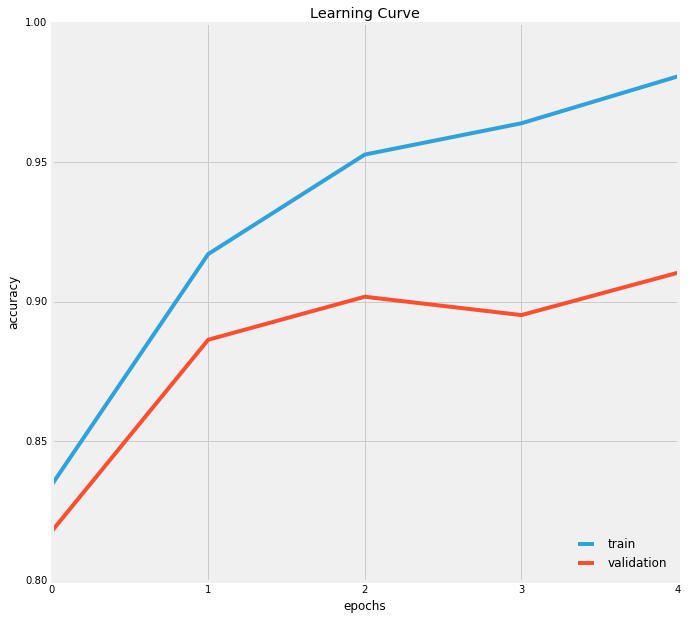

In [126]:
# 4 - Different dimensions
model = build_graph(network_4, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, valid=valid_data, file_name="net_4.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.820
Validation accuracy = 0.838

EPOCH 2
Training accuracy = 0.903
Validation accuracy = 0.901

EPOCH 3
Training accuracy = 0.945
Validation accuracy = 0.924

EPOCH 4
Training accuracy = 0.961
Validation accuracy = 0.935

EPOCH 5
Training accuracy = 0.969
Validation accuracy = 0.949

Model saved under: ./checkpoint/net_5.ckpt


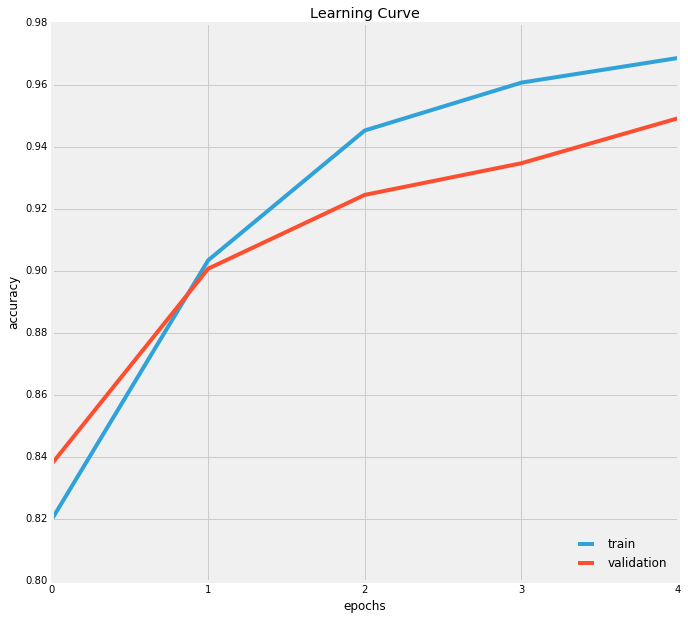

In [127]:
# 5 - Add dropout
model = build_graph(network_5, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, valid=valid_data, file_name="net_5.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.809
Validation accuracy = 0.843

EPOCH 2
Training accuracy = 0.913
Validation accuracy = 0.912

EPOCH 3
Training accuracy = 0.942
Validation accuracy = 0.943

EPOCH 4
Training accuracy = 0.962
Validation accuracy = 0.950

EPOCH 5
Training accuracy = 0.972
Validation accuracy = 0.947

EPOCH 6
Training accuracy = 0.978
Validation accuracy = 0.949

EPOCH 7
Training accuracy = 0.980
Validation accuracy = 0.955

EPOCH 8
Training accuracy = 0.988
Validation accuracy = 0.961

EPOCH 9
Training accuracy = 0.989
Validation accuracy = 0.956

EPOCH 10
Training accuracy = 0.983
Validation accuracy = 0.946

EPOCH 11
Training accuracy = 0.992
Validation accuracy = 0.962

EPOCH 12
Training accuracy = 0.993
Validation accuracy = 0.960

EPOCH 13
Training accuracy = 0.993
Validation accuracy = 0.958

EPOCH 14
Training accuracy = 0.995
Validation accuracy = 0.962

EPOCH 15
Training accuracy = 0.995
Validation accuracy = 0.962

EPOCH 16
Training accuracy = 0.995
V

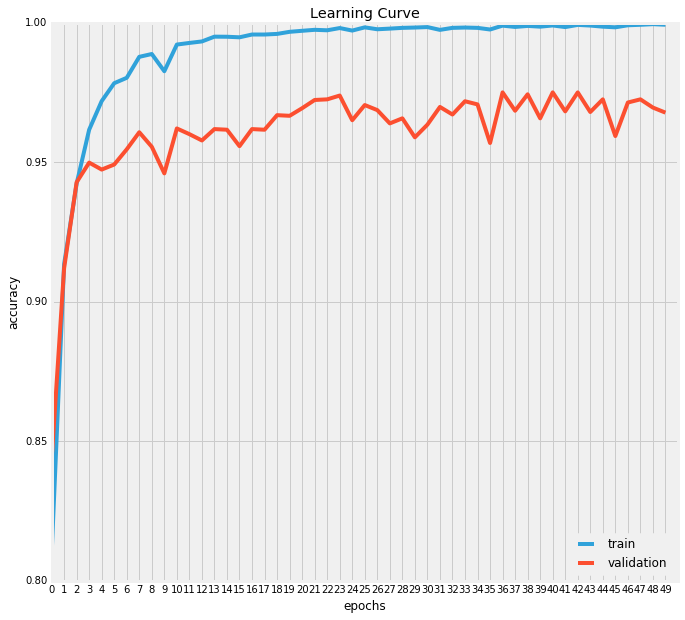

In [198]:
# 5a - Increase epochs 
model = build_graph(network_5, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, valid=valid_data, file_name="net_5a.ckpt", epochs=50, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.864
Validation accuracy = 0.894

EPOCH 2
Training accuracy = 0.947
Validation accuracy = 0.928

EPOCH 3
Training accuracy = 0.968
Validation accuracy = 0.931

EPOCH 4
Training accuracy = 0.983
Validation accuracy = 0.952

EPOCH 5
Training accuracy = 0.987
Validation accuracy = 0.951

Model saved under: ./checkpoint/net_6.ckpt


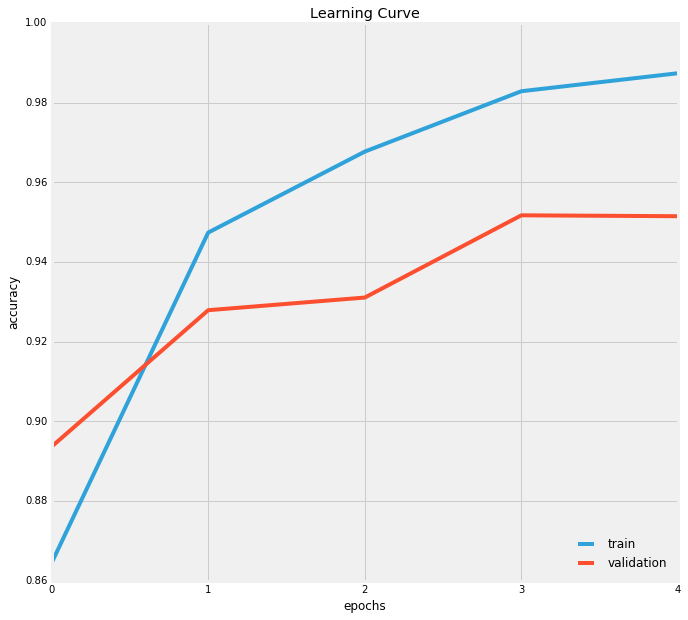

In [135]:
# 6 - Increased dimensions & dropout
model = build_graph(network_6, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, valid=valid_data, file_name="net_6.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

Training...

EPOCH 1
Training accuracy = 0.859
Validation accuracy = 0.859

EPOCH 2
Training accuracy = 0.940
Validation accuracy = 0.937

EPOCH 3
Training accuracy = 0.971
Validation accuracy = 0.941

EPOCH 4
Training accuracy = 0.977
Validation accuracy = 0.942

EPOCH 5
Training accuracy = 0.985
Validation accuracy = 0.944

Model saved under: ./checkpoint/net_7.ckpt


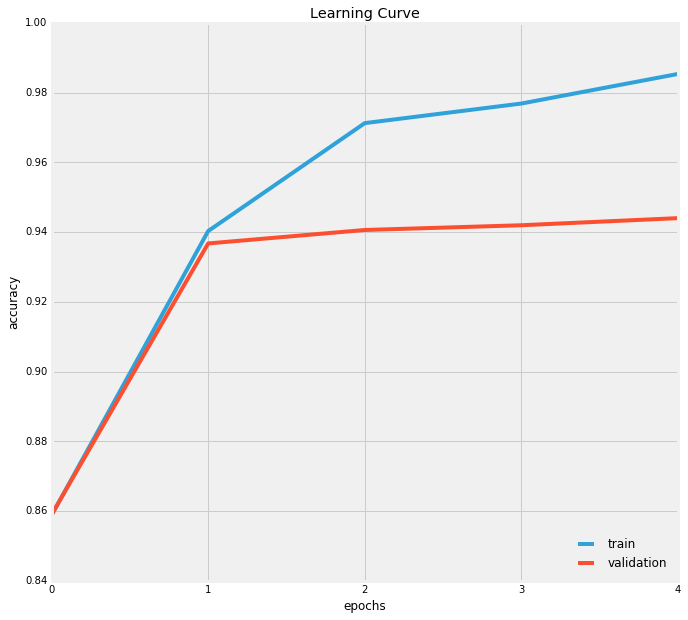

In [138]:
# 7 - Increased dimensions, dropout and additional dense layer
model = build_graph(network_7, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
train_model(model, train=train_data, valid=valid_data, file_name="net_7.ckpt", epochs=EPOCHS, batch_size=BATCH_SIZE)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

--------------------------------------------------
New Test Images
--------------------------------------------------


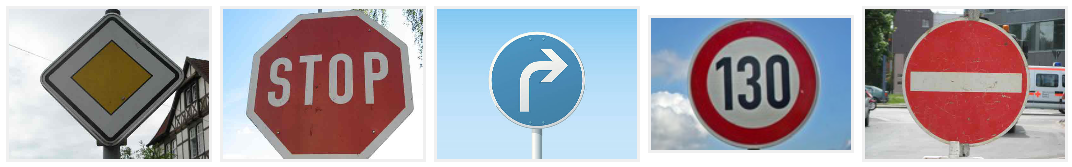

In [170]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
imgs_dir = os.path.join(os.path.curdir,"test_signs")
new_images = []
resized_images = []
for file in os.listdir(imgs_dir):
    img =plt.imread(os.path.join(imgs_dir,file))
    new_images.append(img)
    resized_images.append(resize_image(img, size=IMG_SHAPE))

new_images = np.array(new_images)
resized_images = np.array(resized_images)
print("-" * 50)
print("New Test Images")
print("-" * 50)
plot_images(new_images, 5)

### Predict the Sign Type for Each Image

In [176]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_new, _ = preprocessing([normalize_2], X=resized_images, y=None) 
model = build_graph(network_5, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
file_name = "net_5.ckpt"
predict, top_k = predict_traffic_signs(model, X_new, file_name, batch_size=BATCH_SIZE)

Prediction done.


In [177]:
print(SIGN_NAMES[predict])

['Priority road' 'Stop' 'Turn right ahead' 'Speed limit (100km/h)'
 'No entry']


### Analyze Performance

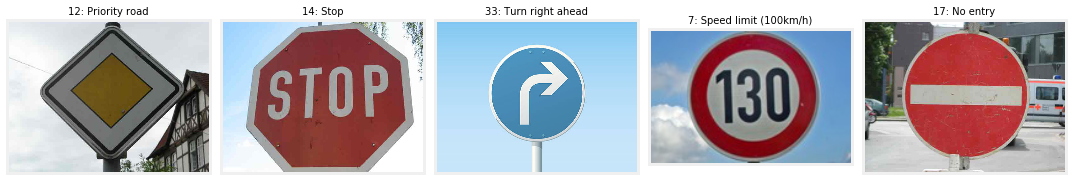

In [178]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
plot_images(new_images, 5, labels=predict)

#### => 4 out of 5 correct (the 130 speed limit image is not in the test set which is why it detected it as some other speed limit sign)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

--------------------------------------------------
Top 5 Predictions
--------------------------------------------------


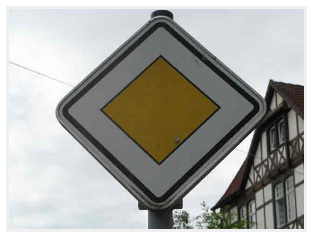

   12: Priority road                                      (100.0000000000%)
   14: Stop                                               (  0.0000002298%)
   32: End of all speed and passing limits                (  0.0000000358%)
   15: No vehicles                                        (  0.0000000182%)
   26: Traffic signals                                    (  0.0000000172%)
--------------------------------------------------


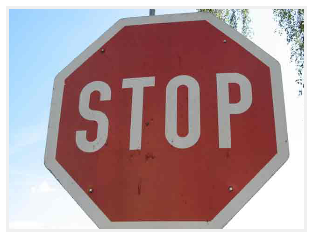

   14: Stop                                               ( 99.3577539921%)
   17: No entry                                           (  0.6235094741%)
   12: Priority road                                      (  0.0041681818%)
   29: Bicycles crossing                                  (  0.0022056882%)
    1: Speed limit (30km/h)                               (  0.0019095578%)
--------------------------------------------------


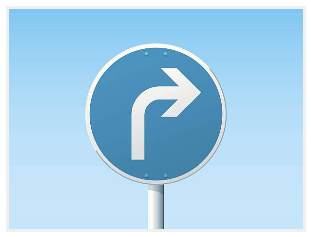

   33: Turn right ahead                                   ( 96.7512011528%)
   37: Go straight or left                                (  1.0774267837%)
   35: Ahead only                                         (  0.9397652932%)
   40: Roundabout mandatory                               (  0.7867662236%)
   39: Keep left                                          (  0.3962323535%)
--------------------------------------------------


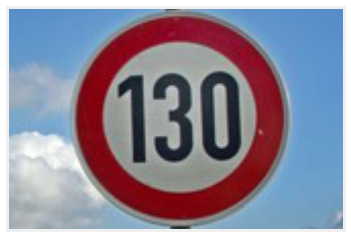

    7: Speed limit (100km/h)                              ( 82.7322125435%)
    8: Speed limit (120km/h)                              ( 13.8727620244%)
    1: Speed limit (30km/h)                               (  1.3174667023%)
    0: Speed limit (20km/h)                               (  0.9280310012%)
    5: Speed limit (80km/h)                               (  0.6122075487%)
--------------------------------------------------


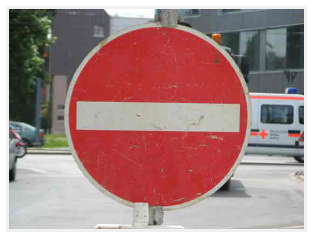

   17: No entry                                           (100.0000000000%)
   14: Stop                                               (  0.0000008620%)
   10: No passing for vehicles over 3.5 metric tons       (  0.0000000405%)
    9: No passing                                         (  0.0000000064%)
   13: Yield                                              (  0.0000000000%)
--------------------------------------------------


In [180]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

print('-' * 50)
print('Top 5 Predictions')
print('-' * 50)

for i, (probs, preds, image) in enumerate(zip(*top_k, new_images)):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    for pred, prob in zip(preds.astype(int), probs):
        sign_name = SIGN_NAMES[pred]
        print('{:>5}: {:<50} ({:>14.10f}%)'.format(pred, sign_name, prob*100.0))
    print('-' * 50) 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [190]:
model = build_graph(network_5, learning_rate=LEARNING_RATE, image_shape=IMG_SHAPE)
file_name = os.path.join(os.path.curdir, "checkpoint", "net_5.ckpt")

In [192]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(model, image_input, tf_activation, file_name, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    x = model["x"]
    is_training = model["is_training"]
    saver = model["saver"]
    
    image_input = np.expand_dims(image_input, axis=0)
    with tf.Session() as sess:
        saver.restore(sess, file_name)
        activation = sess.run(tf_activation,feed_dict={x : image_input, is_training: False})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

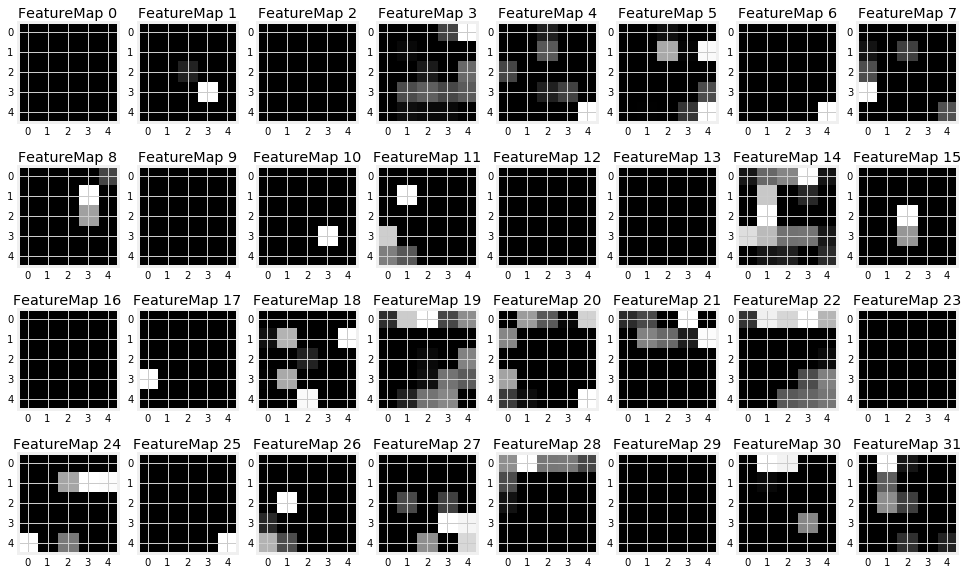

In [194]:
outputFeatureMap(model, X_new[1], model["conv_2"], file_name)

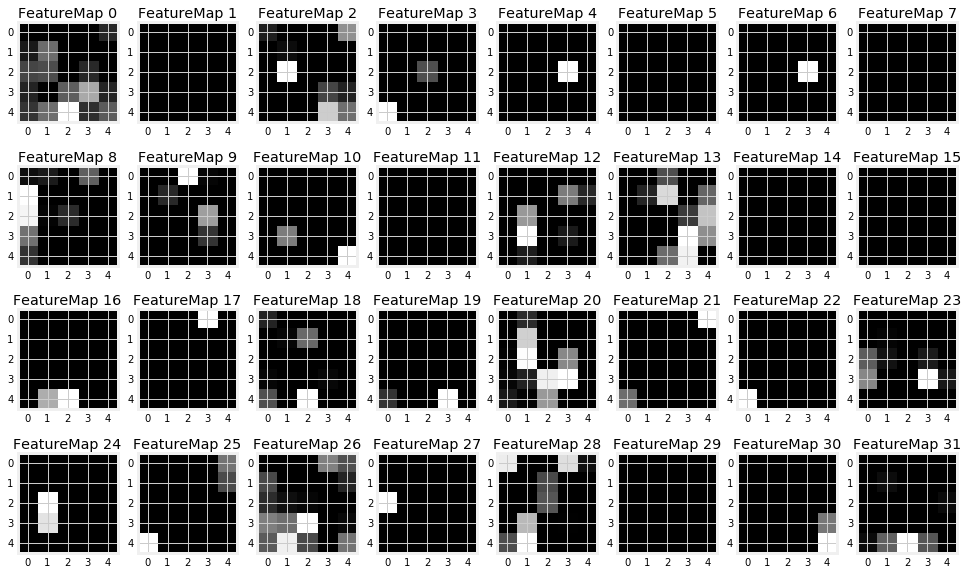

In [195]:
outputFeatureMap(model, X_new[2], model["conv_2"], file_name)